# 1.Importation des librairies

In [157]:
# 1 importation des librairies des 
import numpy as np 
import pandas as pd

# 2 Chargement es donnees

In [158]:
#2 chargement des donnees 
data = pd.read_csv('Data/USA_Housing.csv')

In [159]:
data = data[["Avg. Area Income","Price"]]

In [160]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


# 3.analyse des donnees 

In [161]:
#3. Analyse des donnees 
data.isnull().sum()

Avg. Area Income    0
Price               0
dtype: int64

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Avg. Area Income  5000 non-null   float64
 1   Price             5000 non-null   float64
dtypes: float64(2)
memory usage: 78.3 KB


In [163]:
data['Avg. Area Income'].max()

107701.74837763936

In [164]:
Sdata['Avg. Area Income'].min()

17796.631189543397

In [165]:
print(data['Avg. Area Income'].max())

107701.74837763936


In [166]:
print("max Price : ", data['Price'].max())

max Price :  2469065.5941747027


In [167]:
print("Min Price :", data['Price'].min())

Min Price : 15938.657923287848


# 4.Division des donnees

Variable indp et depend

In [168]:
X = data.iloc[ :, :-1].values
y = data.iloc[ :, -1].values

In [169]:
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [170]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

# 4.1 separation de donnees : Train et Test 

In [171]:
# x_train, x_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [172]:
 X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25,random_state=40)

In [173]:
print("X_train Shape:",X_train.shape)
print("X_test Shape:",X_test.shape)
print("y_test Shape:",y_train.shape)
print("y_test Shape:",y_test.shape)

X_train Shape: (3750, 1)
X_test Shape: (1250, 1)
y_test Shape: (3750,)
y_test Shape: (1250,)


In [174]:
# Importer l'algorithme des la regression linenaire
from sklearn.linear_model import LinearRegression

In [175]:
model_lineaire = LinearRegression()

In [176]:
# entrainement du model
model_lineaire.fit(X_train, y_train)

LinearRegression()

In [177]:
# faire la prédication 
y_Prices_predicts = model_lineaire.predict(X_test)

In [178]:
y_test

array([1435769.76883739, 1668448.09805727, 1762214.67958189, ...,
        975005.77366035, 1393995.96182827, 1036277.0624633 ])

In [179]:
resultats = pd.DataFrame(y_test, y_Prices_predicts)

In [180]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error, r2_score

In [181]:
print("MSE de la regression lineaire:", mean_squared_error(y_test, y_Prices_predicts))

MSE de la regression lineaire: 70345556190.3212


In [182]:
print("R2 de la regression lineaire:", r2_score(y_test, y_Prices_predicts))

R2 de la regression lineaire: 0.43322233931263276


# 6 Visualisation de resultats 

In [183]:
import matplotlib.pyplot as plt

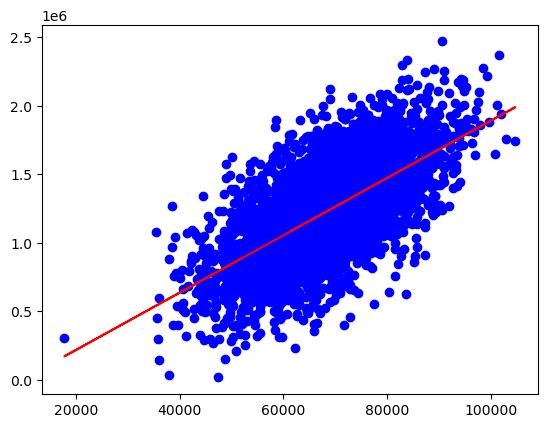

In [184]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
# plt.plot(X_test, Y_scores_predicts, color='red', Label='Ligne La regression')
plt.plot(X_train, model_lineaire.predict(X_train), color='r', label='Ligne de la regression')
plt.show()

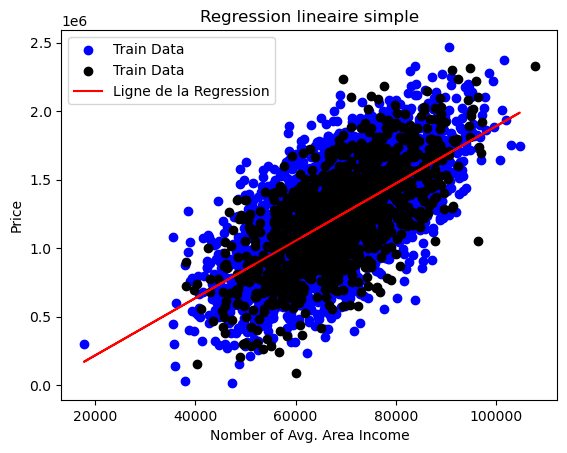

In [185]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Train Data')
plt.plot(X_train, model_lineaire.predict(X_train), color= 'red', label='Ligne de la Regression')
plt.xlabel ('Nomber of Avg. Area Income')
plt.ylabel ('Price')
plt.title('Regression lineaire simple')
plt.legend()
plt.show()

# 7.Predication simple

In [186]:
data.head()

,Avg. Area Income,Price
0,79545.458574,1.059034e+06
1,79248.642455,1.505891e+06
2,61287.067179,1.058988e+06
3,63345.240046,1.260617e+06
4,59982.197226,6.309435e+05


In [187]:
y

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [188]:
resultats = pd.DataFrame({
    'y-Price-reel': y_test,
    'y-Prices-predicts':y_Prices_predicts
})
resultats

,y-Price-reel,y-Prices-predicts
0,1.435770e+06,1.375828e+06
1,1.668448e+06,1.594792e+06
2,1.762215e+06,1.378886e+06
3,1.106261e+06,1.121330e+06
4,1.051124e+06,1.001248e+06
...,...,...
1245,7.054441e+05,9.409852e+05
1246,1.358647e+06,1.629427e+06
1247,9.750058e+05,1.092890e+06
1248,1.393996e+06,1.437100e+06


In [189]:
y_Prices_predicts

array([1375827.6030198 , 1594792.46082882, 1378886.12389639, ...,
       1092889.80072731, 1437100.12333213, 1386649.52532991])

In [190]:
print(model_lineaire.predict([[10]]))

[-202107.54651146]


# 8.Soustraction

In [191]:
sub = y_test - y_Prices_predicts
sub

array([  59942.16581759,   73655.63722844,  383328.55568549, ...,
       -117884.02706696,  -43104.16150386, -350372.46286661])

In [192]:
resultats = pd.DataFrame({
    'y-Price-reel': y_test,
    'y-Prices-predicts':y_Prices_predicts,
    'reste':sub
})
resultats

,y-Price-reel,y-Prices-predicts,reste
0,1.435770e+06,1.375828e+06,59942.165818
1,1.668448e+06,1.594792e+06,73655.637228
2,1.762215e+06,1.378886e+06,383328.555685
3,1.106261e+06,1.121330e+06,-15068.763964
4,1.051124e+06,1.001248e+06,49875.895328
...,...,...,...
1245,7.054441e+05,9.409852e+05,-235541.106927
1246,1.358647e+06,1.629427e+06,-270780.446581
1247,9.750058e+05,1.092890e+06,-117884.027067
1248,1.393996e+06,1.437100e+06,-43104.161504
